Hand Written Digit Recognization

Problem Statement:
Create a basic handwriting recognition system using a pre-trained
machine learning model (e.g., MNIST dataset). Users can write characters or digits, and
the model should predict what they've written.
   


Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist

sns.set(style='white', context='notebook', palette='deep')

2023-11-23 05:46:28.074456: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-23 05:46:28.113175: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 05:46:30.017944: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


Load mnist data from keras

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Draw sample from data

In [4]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

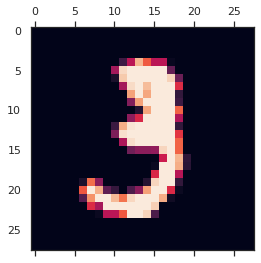

In [5]:
plt.matshow(X_train[10])

In [6]:
y_train[10]

3

Normalize X_train,X_test images

In [7]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

print(X_train[0].shape)

(28, 28)


In [8]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

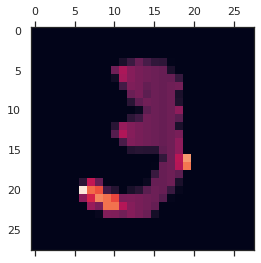

In [9]:
plt.matshow(X_train[10])

creat and fit model

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2493 - accuracy: 0.9251
Epoch 2/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1237 - accuracy: 0.9644
Epoch 3/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0932 - accuracy: 0.9730
Epoch 4/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0705 - accuracy: 0.9787
Epoch 5/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0605 - accuracy: 0.9823
Epoch 6/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0497 - accuracy: 0.9855
Epoch 7/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0454 - accuracy: 0.9872
Epoch 8/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0395 - accuracy: 0.9887
Epoch 9/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0364 - accuracy: 0.9896
Epoch 10/15
1875/1875 [==============================] - 16s 8ms/step - 

Evaluate the model

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1636 - accuracy: 0.9758
0.16355974972248077
0.9757999777793884


predicted and draw sample of a test set

In [13]:
y_predicted = model.predict(X_test)
y_predicted[10]

313/313 [==============================] - 1s 2ms/step


array([1.0000000e+00, 0.0000000e+00, 1.2337036e-25, 2.6203916e-34,
       6.7716159e-36, 2.1342245e-21, 1.6239356e-29, 1.2680350e-31,
       3.0413715e-38, 3.2639687e-18], dtype=float32)

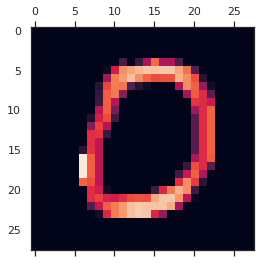

In [14]:
plt.matshow(X_test[10])

In [15]:
np.argmax(y_predicted[10])

0

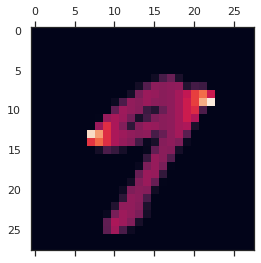

In [16]:
plt.matshow(X_test[20])

In [ ]:
np.argmax(y_predicted[20])